In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

/home/amirtesh/Downloads/Computers/Python/PY_ENV/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
from VisionNet import ImageClassificationModel

In [3]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [4]:
from torch.utils.data import DataLoader

In [5]:
train_dl=DataLoader(train_data,batch_size=128,shuffle=True)
test_dl=DataLoader(test_data,batch_size=128,shuffle=True)

In [6]:
import torch
from torch import nn,optim
import torch.nn.functional as F

In [7]:
class ConvolutionalNetwork(ImageClassificationModel):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.fc1=nn.Linear(5*5*16,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,X):
        X=F.relu(self.conv1(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv2(X))
        X=F.max_pool2d(X,2,2)
        X=X.view(-1,16*5*5)
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.fc3(X)

        return F.log_softmax(X,dim=1)

In [8]:
lr=0.001
wd=1e-4
gc=0.1
epochs=2

In [9]:
model=ConvolutionalNetwork()

In [10]:
loss=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=lr,weight_decay=wd)
sched=optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,epochs=epochs,steps_per_epoch=len(train_dl))

In [11]:
model.compile(loss_fn=loss,
              optimizer=optimizer,
              scheduler=sched,
              grad_clip=gc)

In [12]:
import time
start=time.time()

history=model.fit(epochs=epochs,
                  train_dataset=train_data,
                  val_dataset=test_data,
                  batch_size=128)

print(f'Training time: {(time.time()-start)/60} minutes')

Training on cpu


Epoch [1], train_loss: 0.6231, train_acc: 0.8407, val_loss: 0.3779, val_acc: 0.9100
Epoch [2], train_loss: 0.2314, train_acc: 0.9451, val_loss: 0.1164, val_acc: 0.9698
Training time: 0.24563610951105755 minutes


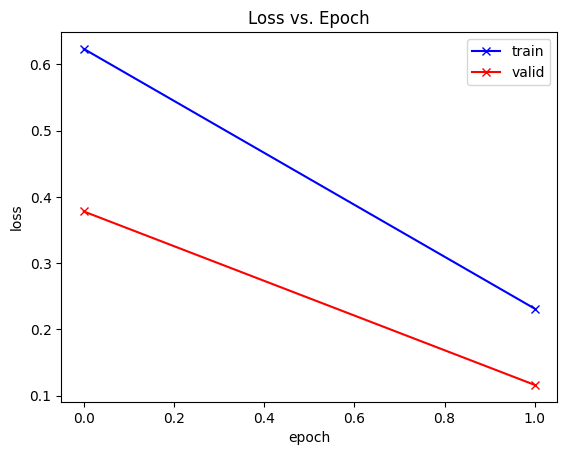

In [13]:
model.plot_losses()

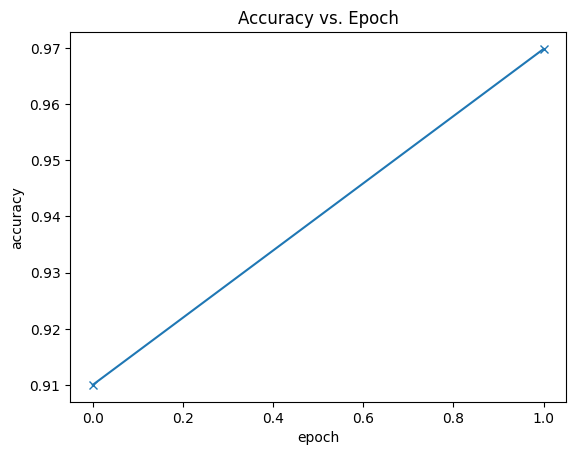

In [14]:
model.plot_accuracies()

In [15]:
model.performance(test_data)

(0.9695, 0.9693867294869483, 0.969539906072724, 0.9693712145939068)